__Author:__ Ekrem Guzelyel

Initial predictions notebook. Look up for candidate_models for a clean set up.


In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

import pprint
import pickle
import re
import random

import matplotlib.pyplot as plt

In [2]:
warren_tweets = pickle.load(open('./CandTweets(Older)/warren_tweets_old_1000.p', 'rb'))
biden_tweets = pickle.load(open('./CandTweets(Older)/biden_tweets_old_1000.p', 'rb'))
bernie_tweets = pickle.load(open('./CandTweets(Older)/bernie_tweets_old_1000.p', 'rb'))
yang_tweets = pickle.load(open('./CandTweets(Older)/yang_tweets_old_1000.p', 'rb'))

In [3]:
warren_senti_scores = pickle.load(open('./SentimentScores/warren_senti_scores.p', 'rb'))
biden_senti_scores = pickle.load(open('./SentimentScores/biden_senti_scores.p', 'rb'))
bernie_senti_scores = pickle.load(open('./SentimentScores/bernie_senti_scores.p', 'rb'))
yang_senti_scores = pickle.load(open('./SentimentScores/yang_senti_scores.p', 'rb'))

In [4]:
for i in warren_tweets:
    if "sister" in i['full_text']:
        print(i['full_text'])

Valeria's little sister applied for DACA, but @realdonaldtrump ended it before she could get it. A federal judge just ruled that the government must resume accepting applications like hers – but the family’s future is still uncertain. Congress needs to pass the #DreamActNow. https://t.co/p8AlwRRibp
I worked with @SenTedCruz to pass a bipartisan resolution designating today as Military Retiree Appreciation Day. As the sister of three vets, I know how much servicemembers contribute even after they leave the military – that deserves special recognition. https://t.co/s3L9l3jEkf
We’ve made some progress #6MonthsAfterMaria, but we’ve still got a long way to go. I’ll be right with our brothers and sisters from #PuertoRico and the USVI every step of the way. https://t.co/5ZKptToD0f
Valeria, a die-hard Patriots fan, came from Brazil at age 7 with her mother and younger sister. Her sister applied for DACA, but @realdonaldtrump ended it before she could be approved. She's counting on a #DreamActN

In [5]:
print(len(warren_senti_scores.keys()))
key = random.choice(list(warren_senti_scores.keys()))
print(key,pprint.pformat(warren_senti_scores[key]))

1000
The @USDOL's conflict-of-interest rule was designed to prevent shady financial advisers from cheating Americans out of their retirement savings. But the Trump Admin wants to weaken it – and now corporate lobbyists have found a court willing to block it. https://t.co/6cQSWpUxhG {'emotion': {'document': {'emotion': {'anger': 0.3191,
                                      'disgust': 0.209904,
                                      'fear': 0.188439,
                                      'joy': 0.087857,
                                      'sadness': 0.418039}}},
 'keywords': [{'count': 1, 'relevance': 0.928035, 'text': "@USDOL's conflict"},
              {'count': 1, 'relevance': 0.862677, 'text': 'Trump Admin'},
              {'count': 1, 'relevance': 0.614555, 'text': 'interest rule'},
              {'count': 1, 'relevance': 0.533334, 'text': 'Americans'},
              {'count': 1, 'relevance': 0.533334, 'text': 'court'},
              {'count': 1,
               'relevance': 0.515

In [6]:
True if warren_tweets[932]['full_text'] in warren_senti_scores.keys() else False

True

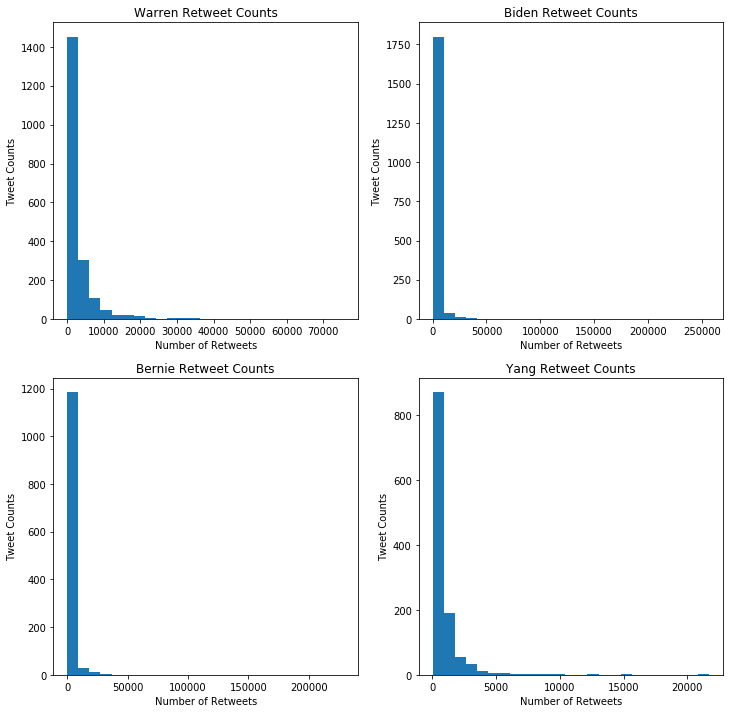

In [185]:
## FINDING THE THRESHOLDS
num_retweets_warren = np.array([warren_tweets[i]['retweet_count']
                                for i in range(len(warren_tweets))])
num_retweets_biden = np.array([biden_tweets[i]['retweet_count']
                               for i in range(len(biden_tweets))])
num_retweets_bernie = np.array([bernie_tweets[i]['retweet_count']
                               for i in range(len(bernie_tweets))])
num_retweets_yang = np.array([yang_tweets[i]['retweet_count']
                             for i in range(len(yang_tweets))])

n_bins = 25
fig, axs = plt.subplots(2,2, figsize=(12,12))

# Plot Warren's subplot
axs[0, 0].hist(num_retweets_warren, bins=n_bins)
axs[0, 0].set_title('Warren Retweet Counts')

axs[0, 1].hist(num_retweets_biden, bins=n_bins)
axs[0, 1].set_title('Biden Retweet Counts')

axs[1, 0].hist(num_retweets_bernie, bins=n_bins)
axs[1, 0].set_title('Bernie Retweet Counts')

axs[1, 1].hist(num_retweets_yang, bins=n_bins)
axs[1, 1].set_title('Yang Retweet Counts')

for ax in axs.flat:
    ax.set(xlabel='Number of Retweets', ylabel='Tweet Counts')

plt.show()

In [8]:
print(len(num_retweets_warren))
sorted(num_retweets_warren)[680]
# num_retweets_warren[]

1000


2336

In [9]:
warren_max_char=316
biden_max_char=315
bernie_max_char=304
yang_max_char=329

# max_char = 0
for i in warren_tweets[0:]:
#     max_char = max(max_char, biden_senti_scores[i['full_text']]['usage']['text_characters'])
    print(i['full_text'])
    print(i['retweet_count'])
    print(pprint.pformat(warren_senti_scores[i['full_text']]))
    print([(j,k) for j,k in warren_senti_scores[i['full_text']]['emotion']['document']['emotion'].items()])
    print(warren_senti_scores[i['full_text']]['sentiment']['document']['score'])
    print(warren_senti_scores[i['full_text']]['usage']['text_characters'])
    break
# print(max_char)

.@realDonaldTrump said his steel tariffs would help the US steel industry. Instead, @CommerceGov gave hundreds of exemptions to subsidiaries of Chinese &amp; Japanese companies. Charging American firms more while foreign companies skate by is just plain wrong. https://t.co/Ud1koloqEd
2298
{'emotion': {'document': {'emotion': {'anger': 0.281753,
                                      'disgust': 0.169792,
                                      'fear': 0.044859,
                                      'joy': 0.031752,
                                      'sadness': 0.613848}}},
 'keywords': [{'count': 1, 'relevance': 0.753111, 'text': 'American firms'},
              {'count': 1, 'relevance': 0.740325, 'text': 'Japanese companies'},
              {'count': 1, 'relevance': 0.73366, 'text': 'steel tariffs'},
              {'count': 1,
               'relevance': 0.588377,
               'text': 'foreign companies skate'},
              {'count': 1, 'relevance': 0.572763, 'text': 'US steel indu

In [7]:
True if warren_tweets[999]['full_text'] in warren_senti_scores.keys() else False

True

In [8]:
# Completed values
for i in warren_tweets:
    print([k for j,k in warren_senti_scores[i['full_text']]['emotion']['document']['emotion'].items()])
    print(warren_senti_scores[i['full_text']]['sentiment']['document']['score'])
    print(warren_senti_scores[i['full_text']]['usage']['text_characters']/warren_max_char)
    break


[0.613848, 0.031752, 0.044859, 0.169792, 0.281753]
-0.918284
0.8987341772151899


#### Creating the features and labels

In [9]:
warren_features = []
warren_labels = []
for i in warren_tweets:
    # Feature
    tweet_feature = []
    for j,k in warren_senti_scores[i['full_text']]['emotion']['document']['emotion'].items():
        tweet_feature.append(k)
    tweet_feature.append(warren_senti_scores[i['full_text']]['sentiment']['document']['score'])

    tweet_feature.append(warren_senti_scores[i['full_text']]['usage']['text_characters']/warren_max_char)
    warren_features.append(tweet_feature)
    
    # Label
    if i['retweet_count'] <= 650:
        warren_labels.append(-1)
    elif i['retweet_count'] <= 2274:
        warren_labels.append(0)
    else:
        warren_labels.append(1)
    
print(pprint.pformat(warren_features[18:20]))
warren_labels[18:20]

[[0.204482,
  0.072045,
  0.267289,
  0.520592,
  0.277947,
  -0.374408,
  0.6993670886075949],
 [0.048237,
  0.71682,
  0.027541,
  0.071069,
  0.064859,
  0.388174,
  0.6740506329113924]]


[0, -1]

In [174]:
warren_tweets[1]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Oct 31 16:14:13 +0000 2018',
 'display_text_range': [0, 279],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'apnews.com/bbf3d73e47c542…',
    'expanded_url': 'https://www.apnews.com/bbf3d73e47c542eb80b3d930305cf855',
    'indices': [256, 279],
    'url': 'https://t.co/lFnZz4WyC5'}],
  'user_mentions': [{'id': 888031054141022209,
    'id_str': '888031054141022209',
    'indices': [40, 56],
    'name': 'Mick Mulvaney',
    'screen_name': 'MickMulvaneyOMB'},
   {'id': 234826866,
    'id_str': '234826866',
    'indices': [194, 199],
    'name': 'consumerfinance.gov',
    'screen_name': 'CFPB'}]},
 'favorite_count': 1088,
 'favorited': False,
 'full_text': 'Payday lenders contributed over $60k to @MickMulvaneyOMB’s political campaigns – and they sure are getting their money’s worth. Instead of protecting consumers, Mulvaney is preparing to gut the @CFPB rules that stop payday lenders from ripping pe

In [177]:
warren_labels=[]
for i in warren_tweets:
    print(i['retweet_count'])
    break

2298


## Logistic Regression

In [49]:
# from sklearn.feature_extraction import stop_words
# from sklearn.preprocessing import Binarizer
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_recall_fscore_support, auc, roc_auc_score

In [195]:
X_train, X_test, y_train, y_test = train_test_split(warren_features, warren_labels, test_size=1/3, random_state=42)
len(X_train), len(y_train)

(666, 666)

In [245]:
lr = LogisticRegression(C=4.0, penalty='l1')
lr.fit(X_train, y_train)

LogisticRegression(C=4.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [247]:
lr.predict(X_test)

array([-1,  0,  0,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  0, -1,  1,  1,
       -1, -1,  0, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  0, -1, -1, -1,
        0, -1,  1, -1, -1,  1,  1,  0,  1,  1, -1, -1,  0, -1, -1, -1, -1,
        1,  0, -1,  1,  1,  1,  1,  0, -1,  1,  1,  1, -1, -1, -1,  0, -1,
        1,  0,  1, -1,  1, -1,  1,  0, -1,  1,  1,  1, -1,  1, -1,  0, -1,
        0, -1,  1,  1, -1,  1,  0, -1,  1, -1, -1, -1, -1, -1,  0,  1,  1,
       -1, -1,  0, -1,  1, -1,  1,  0,  0, -1, -1, -1,  1,  0,  1, -1, -1,
        0, -1, -1, -1,  0,  1,  1, -1, -1,  1,  1,  1,  0,  1,  1, -1, -1,
        1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,
        1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1,
        0, -1,  1,  0,  1, -1,  1,  0,  1, -1, -1,  1,  0,  1,  0, -1,  1,
       -1, -1,  1,  1, -1,  1,  1, -1,  0,  1, -1, -1, -1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1,  0, -1, -1,  0, -1,  1,  1, -1,  0, -1, -1,  1,
       -1, -1, -1, -1,  1

In [248]:
lr.score(X_test, y_test)

0.4101796407185629

### Re-trying LR with discarding ambigious interval...

Disregard the ambigious class between 320-340th, 660-680th tweets. 

In [287]:
sorted(num_retweets_warren)[320], sorted(num_retweets_warren)[340], sorted(num_retweets_warren)[660], sorted(num_retweets_warren)[680]

(619, 667, 2239, 2336)

In [308]:
warren_features = []
warren_labels = []
for i in warren_tweets:
    # Label
    if i['retweet_count'] < 619:
        warren_labels.append(-1)
    elif i['retweet_count'] > 667 and i['retweet_count'] < 2239:
        warren_labels.append(0)
    elif i['retweet_count'] >= 2336:
        warren_labels.append(1)
    else:
        continue
        
    # Feature
    tweet_feature = []
    for j,k in warren_senti_scores[i['full_text']]['emotion']['document']['emotion'].items():
        tweet_feature.append(k)
    tweet_feature.append(warren_senti_scores[i['full_text']]['sentiment']['document']['score'])

    tweet_feature.append(warren_senti_scores[i['full_text']]['usage']['text_characters']/warren_max_char)
    warren_features.append(tweet_feature)
    
    
print(pprint.pformat(warren_features[18:20]))
warren_labels[18:20]

[[0.21666, 0.432566, 0.10167, 0.07272, 0.26825, 0.744959, 0.8829113924050633],
 [0.196019,
  0.201822,
  0.121296,
  0.536446,
  0.128513,
  -0.467573,
  0.879746835443038]]


[0, 0]

In [309]:
len([i for i in warren_labels if i==-1]),len([i for i in warren_labels if i==0]),len([i for i in warren_labels if i==1])

(320, 319, 320)

In [310]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(warren_features, warren_labels, test_size=1/3, random_state=42)
len(X_train_3), len(y_train_3)

(639, 639)

In [362]:
lr3 = LogisticRegression(C=1.0, penalty='l2')
lr3.fit(X_train_3, y_train_3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [363]:
lr3.score(X_test_3, y_test_3)

0.40625

In [400]:
preds3 = lr3.predict(X_test_3)
f1_score(preds3, y_test_3, average='weighted')

0.42949511306507765

### Re-trying LR with only binary classes...

Disregard the ambigious class between 450-550th tweets. 

In [410]:
sorted(num_retweets_warren)[450], sorted(num_retweets_warren)[700]

(1053, 2454)

In [411]:
warren_features = []
warren_labels = []
for i in warren_tweets:
    # Label
    if i['retweet_count'] <= 1053:
        warren_labels.append(-1)
    elif i['retweet_count'] >= 2454:
        warren_labels.append(1)
    else:
        continue
        
    # Feature
    tweet_feature = []
    for j,k in warren_senti_scores[i['full_text']]['emotion']['document']['emotion'].items():
        tweet_feature.append(k)
    tweet_feature.append(warren_senti_scores[i['full_text']]['sentiment']['document']['score'])

    tweet_feature.append(warren_senti_scores[i['full_text']]['usage']['text_characters']/warren_max_char)
    warren_features.append(tweet_feature)
    
    
print(pprint.pformat(warren_features[18:20]))
warren_labels[18:20]

[[0.226024,
  0.354156,
  0.078594,
  0.308501,
  0.105052,
  0.55189,
  0.9272151898734177],
 [0.275676,
  0.041561,
  0.111931,
  0.539487,
  0.253387,
  -0.71243,
  0.8829113924050633]]


[1, -1]

In [412]:
len(warren_labels)

751

In [413]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(warren_features, warren_labels, test_size=1/3, random_state=42)
len(X_train_2), len(y_train_2)

(500, 500)

In [414]:
lr2 = LogisticRegression(C=10.0, penalty='l1')
lr2.fit(X_train_2, y_train_2)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [415]:
lr2.score(X_test_2, y_test_2)

0.6414342629482072

In [421]:
preds2 = lr2.predict(X_test_2)
f1_score(preds2, y_test_2, average='weighted')
precision_recall_fscore_support(preds2, y_test_2) # average='weighted'
roc_auc_score(preds2, y_test_2)

0.6247187399549985

### Re-analyzing Low Reach Tweets

In [382]:
for i in warren_tweets:
    if i['retweet_count']<70:
        print(i['full_text'])  

@burgessev @SteveDaines @JohnCornyn Seriously, @burgessev? #2? I could smoke @SteveDaines any day of the week.
Después de María, he presionado repetidamente para obtener una cifra precisa de víctimas en PR para comprender el alcance de la tragedia, planear para futuros desastres y asegurar que aquellos que perdieron a sus seres queridos reciban la ayuda necesaria:https://t.co/tTKZSLtpcH
Muchos boricuas dejaron sus hogares después de Maria. Algunos terminaron en MA, donde más de 300 mil personas tienen vínculos con PR. Presenté una ley para obligar a Trump a activar un programa para ayudar a los desplazados, lo que @FEMA se niega a hacer. https://t.co/OYytZydE61
@kayhanley @SIRIUSXM Hi @kayhanley, I absolutely support the #MusicModernizationAct. I signed on as a cosponsor earlier today. Thanks for your work to help get this bill to the finish line – and keep making great music!
I’ll be on @BosPublicRadio with @JimBraude and @MargeryEagan today at 12:00pm. Tune in live here:
https://t.co

I looked at Warren's tweets. There is a clear distinction between low reach tweets and high reach tweets. The ones that have low reach mostly happens during a normal day, with no viral topic at all. Those stay below 1.2k. However, the ones with high reach have a video/picture, or a viral topic. That is more than 5k.

Other values between 1.2k-4k can be considered as normal reach. They vary on the content, some has pictures, some videos, some just a campaign. 

#### Linear Regression with Just Reach (No classification)

In [422]:
from sklearn.linear_model import LinearRegression

In [12]:
warren_features = []
warren_labels = []
for i in warren_tweets:
    # Label
    warren_labels.append(i['retweet_count'])
        
    # Feature
    tweet_feature = []
    for j,k in warren_senti_scores[i['full_text']]['emotion']['document']['emotion'].items():
        tweet_feature.append(k)
    tweet_feature.append(warren_senti_scores[i['full_text']]['sentiment']['document']['score'])

    tweet_feature.append(warren_senti_scores[i['full_text']]['usage']['text_characters']/warren_max_char)
    warren_features.append(tweet_feature)
    
    
print(pprint.pformat(warren_features[18:20]))
warren_labels[18:20]

[[0.204482,
  0.072045,
  0.267289,
  0.520592,
  0.277947,
  -0.374408,
  0.6993670886075949],
 [0.048237,
  0.71682,
  0.027541,
  0.071069,
  0.064859,
  0.388174,
  0.6740506329113924]]


[2124, 503]

In [13]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(warren_features, warren_labels, test_size=1/3, random_state=42)
len(X_train_l), len(y_train_l)

(666, 666)

In [424]:
lin = LinearRegression()

In [426]:
lin.fit(X_train_l, y_train_l)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [430]:
# lin.score(X_test_l, y_test_l)
lin_preds = lin.predict(X_test_l)

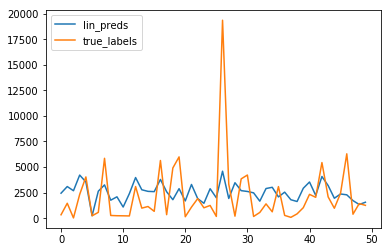

In [434]:
x = np.arange(len(lin_preds[:50]))

plt.plot(x, lin_preds[:50])
plt.plot(x, y_test_l[:50])

plt.legend(['lin_preds', 'true_labels'], loc='upper left')

plt.show()

#### SVM Binary

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scl = StandardScaler()

In [65]:
scaled_warren_features = scl.fit_transform(warren_features)

In [62]:
scl.transform(warren_features)

array([[ 1.43209869, -0.79012306, -0.75352047, ...,  0.56993764,
        -1.01341294,  0.75500829],
       [ 1.84182973, -0.67869037, -0.64316214, ...,  0.2657893 ,
        -0.00744644,  0.66265931],
       [-1.40231738, -0.56897156, -0.33825993, ...,  0.07964346,
        -0.20192235,  0.82888747],
       ...,
       [-0.06943437,  1.61547808, -0.74268766, ..., -0.59436238,
         1.30766595, -1.35054836],
       [-0.856667  , -0.18760448, -0.56448706, ..., -0.77048632,
         1.50945124, -2.23709853],
       [-0.0859437 ,  0.06831728,  0.64608399, ...,  0.37470184,
         1.50845171, -1.92311201]])

In [63]:
print(warren_features[0])

[0.613848, 0.031752, 0.044859, 0.169792, 0.281753, -0.918284, 0.8987341772151899]


In [66]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(scaled_warren_features, warren_labels, test_size=1/3, random_state=42)
len(X_train_sc), len(y_train_sc)

(666, 666)

In [71]:
svm1 = SVC(C=1.0, degree=10, decision_function_shape="ovr", probability=True, tol=0.000001)

In [72]:
svm1.fit(X_train_sc, y_train_sc)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=1e-06, verbose=False)

In [73]:
svm1.score(X_test_l, y_test_l)

0.0

In [74]:
svm1.score(X_train_l, y_train_l)

0.009009009009009009

## CREATE A CORPUS

In [23]:
corpus = set()
for tweet in warren_senti_scores:
#     print(tweet)
    corpus.update({i['text'] for i in warren_senti_scores[tweet]['keywords']})
#     print(corpus)
len(corpus)

3924

In [36]:
sorted_corpus = sorted(corpus)
sorted_corpus

['#1job',
 '#4profit',
 '#4profit colleges',
 '#BankLobbyistAct',
 '#CAREact',
 '#DeVosWatch',
 '#DreamActNow',
 '#EarthDay',
 '#EndGunViolence',
 '#EqualPayDay',
 '#EquifaxBreach',
 '#GOPTaxScam',
 '#GOPtaxscam',
 '#HurricaneMaria',
 '#HurricaneMaria devastó',
 '#IranDeal',
 '#Janus v',
 '#MAsnow',
 '#MVGasFire recovery efforts',
 '#MVGasFires',
 '#MVgasfires',
 '#MedicareForAll',
 '#MemorialDay',
 '#OneBostonDay',
 '#OpioidEpidemic',
 '#PuertoRico',
 '#PuertoRico today',
 '#RoevWade',
 '#SCOTUS',
 '#SOTU',
 '#StopKavanaugh',
 '#StopPompeo',
 '#TimeToWakeUp',
 '#UnrigtheSystem',
 '#VeteransDay',
 '#WorldRefugeeDay',
 '#WorldSeries',
 '1.5M jobs',
 '100k',
 '15-year high',
 '18th year',
 '19th Amendment',
 '1M.',
 '1st presidential candidate',
 '1st quarter',
 '232M. That',
 '25th District of New York',
 '2nd grade',
 '3D',
 '4-year-old son',
 '4.5M Americans',
 '4M Americans',
 '5-year',
 '500-page',
 '5th Circuit',
 '6MonthsAfterMaria',
 '70x',
 '7th graders',
 '@60minutes',
 '@ACLU'

In [45]:
onehot=[]
for tweet in warren_senti_scores:
    text_relevance = dict({i['text']:i['relevance'] for i in warren_senti_scores[tweet]['keywords']})
#     print(includes)
    tweet_onehot=[]
    for keys in sorted_corpus:
#         print(keys)
        tweet_onehot.append(0 if keys not in text_relevance.keys() else text_relevance[keys])
    onehot.append(tweet_onehot)
onehot[:2]

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.427779,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.394168,
  0,
  0,
  0,
  0,
  0,
  0,
 

In [153]:
sorted_corpus[2345:2357]

['heart-wrenching',
 'hearts',
 'heat',
 'heavy hearts today',
 'heck',
 'heist',
 'hell',
 'help',
 'hide',
 'high drug prices',
 'high school',
 'high school valedictorian']

In [165]:
warren_features = []
warren_labels = []
warren_feature_names = ['sadness',
 'joy',
 'fear',
 'disgust',
 'anger',
 'sentiment',
 'character'] + [i for i in sorted_corpus]
for i in warren_tweets:
    # Label (3-Label) -> 44.9%
#     if i['retweet_count'] <= 650:
#         warren_labels.append(-1)
#     elif i['retweet_count'] <= 2274:
#         warren_labels.append(0)
#     else:
#         warren_labels.append(1)

    # Ambigious interval discarded (3-Label) -> 44.6%
#     if i['retweet_count'] < 619:
#         warren_labels.append(-1)
#     elif i['retweet_count'] > 667 and i['retweet_count'] < 2239:
#         warren_labels.append(0)
#     elif i['retweet_count'] >= 2336:
#         warren_labels.append(1)
#     else:
#         continue
    
    # Ambigious discarded Binary Labels -> 71.3%
    if i['retweet_count'] <= 1053:
        warren_labels.append(-1)
    elif i['retweet_count'] >= 2454:
        warren_labels.append(1)
    else:
        continue
    
    # Feature
    tweet_feature = []
    for j,k in warren_senti_scores[i['full_text']]['emotion']['document']['emotion'].items():
        tweet_feature.append(k)
    tweet_feature.append(warren_senti_scores[i['full_text']]['sentiment']['document']['score'])
    warren_feature_names.append('sentiment')
    
    tweet_feature.append(warren_senti_scores[i['full_text']]['usage']['text_characters']/warren_max_char)
    warren_feature_names.append('character')
    
    # One-hot Encoded Features
    text_relevance = dict({sent['text']:sent['relevance'] for sent in warren_senti_scores[i['full_text']]['keywords']})
    tweet_onehot=[]
    for keys in sorted_corpus:
        
        tweet_onehot.append(0 if keys not in text_relevance.keys() else text_relevance[keys])
    tweet_feature.extend(tweet_onehot)
    
    # Add all to features matrix
    warren_features.append(tweet_feature)
    
    
    
# print(pprint.pformat(warren_features[18]))
# warren_labels[18]
warren_feature_names[:10]

['sadness',
 'joy',
 'fear',
 'disgust',
 'anger',
 'sentiment',
 'character',
 '#1job',
 '#4profit',
 '#4profit colleges']

In [167]:
with open('FeatureData/features.pk', 'wb') as file:
    pickle.dump([warren_features, warren_feature_names, warren_labels], file)

In [162]:
warren_features[0], 

([0.690685,
  0.053923,
  0.058938,
  0.200726,
  0.238021,
  -0.345619,
  0.8829113924050633,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.718395,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [66]:
print(len(warren_features),len(warren_labels))
X_train_corp, X_test_corp, y_train_corp, y_test_corp = train_test_split(warren_features, warren_labels, test_size=1/3, random_state=42)
len(X_train_corp), len(y_train_corp)

751 751


(500, 500)

#### LR with Corpus

In [82]:
lr = LogisticRegression(C=4.0, penalty='l2')
lr.fit(X_train_corp, y_train_corp)

LogisticRegression(C=4.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [150]:
# lr.score(X_train_corp, y_train_corp)
lr.score(X_test_corp, y_test_corp)

0.7131474103585658

In [152]:
# sorted(lr.coef_[0], reverse=True)[:10]
print(lr.coef_[0][:5])
np.argwhere(lr.coef_[0] < -1.310588568706148)
sum(lr.coef_[0]), len(lr.coef_[0])

[-1.14706    -0.88767129  0.91030402  1.78770717  1.66605647]


(-3.3209447162113284, 3931)

#### SVM with Corpus

In [113]:
svm = SVC(C=100, kernel='linear')
svm.fit(X_train_corp, y_train_corp)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [114]:
svm.score(X_test_corp, y_test_corp)

0.6972111553784861

In [116]:
svm.coef_[:1]

array([[-0.15419444, -0.33549127, -0.13797409, ...,  0.        ,
        -0.08189496,  0.11552875]])

## New Tweets and Sentiments

In [168]:
import sklearn as sk
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

import pprint
import pickle
import re
import random

import matplotlib.pyplot as plt

In [169]:
warren_tweets = pickle.load(open('./tweetsent/tweets/old/warren_tweets_old.pkl', 'rb'))
biden_tweets = pickle.load(open('./tweetsent/tweets/old/biden_tweets_old.pkl', 'rb'))
bernie_tweets = pickle.load(open('./tweetsent/tweets/old/bernie_tweets_old.pkl', 'rb'))
yang_tweets = pickle.load(open('./tweetsent/tweets/old/yang_tweets_old.pkl', 'rb'))

In [171]:
len(warren_tweets), len(biden_tweets), len(bernie_tweets), len(yang_tweets)

(1989, 1863, 1231, 1186)

In [183]:
warren_senti_scores = pickle.load(open('./tweetsent/senti_scores/warren_senti_scores.pkl', 'rb'))
biden_senti_scores = pickle.load(open('./tweetsent/senti_scores/biden_senti_scores.pkl', 'rb'))
bernie_senti_scores = pickle.load(open('./tweetsent/senti_scores/bernie_senti_scores.pkl', 'rb'))
yang_senti_scores = pickle.load(open('./tweetsent/senti_scores/yang_senti_scores.pkl', 'rb'))

In [184]:
len(warren_senti_scores), len(biden_senti_scores), len(bernie_senti_scores), len(yang_senti_scores)

(1988, 1862, 1231, 1186)

In [177]:
warren_tweets[0]["full_text"]

'Americans know Washington isn’t working for them. But instead of giving up, more and more people are demanding a government that is run by the people, for the people – and my plan to #EndCorruptionNow would do just that. https://t.co/b47OCAhHjy'

In [181]:
for i in warren_tweets:
    if i['full_text'] not in warren_senti_scores:
        print(i)
# There is a duplicate tweet by the candidate.

# warren_senti_scores[warren_tweets[0]["full_text"]]

In [186]:
print(len(warren_senti_scores.keys()))
key = random.choice(list(warren_senti_scores.keys()))
print(key,pprint.pformat(warren_senti_scores[key]))

1988
Last year, I called out shady mortgage lenders who exploit veterans for profit, and the federal agencies in charge created a task force to address the issue. Now those lenders have been put on notice: Cut it out, or you’ll be cut off. https://t.co/DMGJWY74MN https://t.co/SdJdIPEADx {'emotion': {'document': {'emotion': {'anger': 0.417616,
                                      'disgust': 0.287728,
                                      'fear': 0.102128,
                                      'joy': 0.050633,
                                      'sadness': 0.390527}}},
 'keywords': [{'count': 1, 'relevance': 0.98819, 'text': 'Last year'},
              {'count': 1,
               'relevance': 0.92586,
               'text': 'shady mortgage lenders'},
              {'count': 1, 'relevance': 0.848246, 'text': 'federal agencies'},
              {'count': 1, 'relevance': 0.732461, 'text': 'task force'},
              {'count': 1, 'relevance': 0.572873, 'text': 'veterans'},
              {

In [192]:
warren_max_char=316
biden_max_char=316
bernie_max_char=304
yang_max_char=329

# max_char = 0
for i in warren_tweets[0:]:
#     max_char = max(max_char, yang_senti_scores[i['full_text']]['usage']['text_characters'])
    print(i['full_text'])
    print(i['retweet_count'])
    print(pprint.pformat(warren_senti_scores[i['full_text']]))
    print([(j,k) for j,k in warren_senti_scores[i['full_text']]['emotion']['document']['emotion'].items()])
    print(warren_senti_scores[i['full_text']]['sentiment']['document']['score'])
    print(warren_senti_scores[i['full_text']]['usage']['text_characters'])
    break
# print(max_char)

Americans know Washington isn’t working for them. But instead of giving up, more and more people are demanding a government that is run by the people, for the people – and my plan to #EndCorruptionNow would do just that. https://t.co/b47OCAhHjy
1250
{'emotion': {'document': {'emotion': {'anger': 0.273199,
                                      'disgust': 0.275686,
                                      'fear': 0.041103,
                                      'joy': 0.032839,
                                      'sadness': 0.563883}}},
 'keywords': [{'count': 3, 'relevance': 0.722971, 'text': 'people'},
              {'count': 1, 'relevance': 0.643756, 'text': 'Americans'},
              {'count': 1, 'relevance': 0.619072, 'text': 'government'},
              {'count': 1, 'relevance': 0.563929, 'text': 'plan'},
              {'count': 1, 'relevance': 0.555878, 'text': 'Washington'},
              {'count': 1, 'relevance': 0.439554, 'text': 'EndCorruptionNow'}],
 'language': 'en',
 'sentim

In [193]:
num_retweets_warren = np.array([warren_tweets[i]['retweet_count']
                                for i in range(len(warren_tweets))])
num_retweets_biden = np.array([biden_tweets[i]['retweet_count']
                               for i in range(len(biden_tweets))])
num_retweets_bernie = np.array([bernie_tweets[i]['retweet_count']
                               for i in range(len(bernie_tweets))])
num_retweets_yang = np.array([yang_tweets[i]['retweet_count']
                             for i in range(len(yang_tweets))])

In [209]:
print(len(num_retweets_warren)/2)
print(sorted(num_retweets_warren)[844])
sorted(num_retweets_warren)[1144]
# num_retweets_warren[]

994.5
1048


1697

In [213]:
warren_features = []
warren_labels = []
for i in warren_tweets:
    # Label
    if i['retweet_count'] <= 1083:
        warren_labels.append(-1)
    elif i['retweet_count'] >= 1614:
        warren_labels.append(1)
    else:
        continue
        
    # Feature
    tweet_feature = []
    for j,k in warren_senti_scores[i['full_text']]['emotion']['document']['emotion'].items():
        tweet_feature.append(k)
    tweet_feature.append(warren_senti_scores[i['full_text']]['sentiment']['document']['score'])

    tweet_feature.append(warren_senti_scores[i['full_text']]['usage']['text_characters']/warren_max_char)
    warren_features.append(tweet_feature)
    
    
print(pprint.pformat(warren_features[18:20]))
warren_labels[18:20]

[[0.167203,
  0.134603,
  0.115355,
  0.305017,
  0.42295,
  -0.634016,
  0.8607594936708861],
 [0.04149, 0.447307, 0.108426, 0.017061, 0.08167, 0, 0.4462025316455696]]


[1, -1]

In [214]:
count =0
sum(warren_labels), len(warren_labels)

(4, 1742)

In [216]:
print(len(warren_features),len(warren_labels))
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(warren_features, warren_labels, test_size=1/3, random_state=42)
len(X_train_new), len(y_train_new)

1742 1742


(1161, 1161)

### LR no Keywords

In [215]:
from sklearn.linear_model import LinearRegression

In [232]:
lrnew = LogisticRegression(C=2.0)

In [233]:
lrnew.fit(X_train_new,y_train_new)

LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [234]:
lrnew.score(X_test_new, y_test_new)

0.5920826161790017

### SVM Scaled-NonScaled

In [235]:
from sklearn.preprocessing import StandardScaler

In [248]:
svmnew = SVC(C=1.0,kernel='linear', degree=10, decision_function_shape="ovr", probability=True, tol=0.000001)

In [249]:
svmnew.fit(X_train_new, y_train_new)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=1e-06, verbose=False)

In [250]:
svmnew.score(X_test_new, y_test_new)

0.5886402753872634

In [253]:
# SCALE
sclnew = StandardScaler()
scaled_warren_features_new = sclnew.fit_transform(warren_features)
X_train_sc_new, X_test_sc_new, y_train_sc_new, y_test_sc_new = train_test_split(scaled_warren_features_new, warren_labels, test_size=1/3, random_state=42)
len(X_train_sc_new), len(y_train_sc_new)

(1161, 1161)

In [255]:
svmsc_new = SVC(C=1.0,kernel='rbf', degree=10, decision_function_shape="ovr", probability=True, tol=0.000001)
svmsc_new.fit(X_train_sc_new, y_train_sc_new)
svmsc_new.score(X_test_sc_new, y_test_sc_new)

0.6196213425129088

### Creating Corpus

In [256]:
corpus = set()
for tweet in warren_senti_scores:
    corpus.update({i['text'] for i in warren_senti_scores[tweet]['keywords']})
len(corpus)

5712

In [257]:
sorted_corpus = sorted(corpus)
sorted_corpus

['#1job',
 '#4profit',
 '#4profit colleges',
 '#BankLobbyistAct',
 '#CAREact',
 '#DeVosWatch',
 '#DefendDACA',
 '#DreamActNow',
 '#EarthDay',
 '#EndGunViolence',
 '#EqualPayDay',
 '#EquifaxBreach',
 '#ForeverGIbill',
 '#GOPTaxScam',
 '#GOPtaxscam',
 '#HurricaneMaria',
 '#HurricaneMaria devastó',
 '#IranDeal',
 '#Irandeal',
 '#Janus v',
 '#LaborDay',
 '#MAsnow',
 '#MVGasFire recovery efforts',
 '#MVGasFires',
 '#MVgasfires',
 '#MedicareForAll',
 '#MemorialDay',
 '#MuslimBan',
 '#NoMuslimBan #NoBanNoWall',
 '#OneBostonDay',
 '#OpioidEpidemic',
 '#PuertoRico',
 '#PuertoRico today',
 '#RoevWade',
 '#SCOTUS',
 '#SOTU',
 '#StayCovered',
 '#StopKavanaugh',
 '#StopPompeo',
 '#TimeToWakeUp',
 '#Trumpcare',
 '#UnrigtheSystem',
 '#VeteransDay',
 '#WorldRefugeeDay',
 '#WorldSeries',
 '#WrongCHOICEAct',
 '#WrongChoiceAct',
 '#defendDACA',
 '1.5M jobs',
 '10-yr-old boy’s letter',
 '100k',
 '100s of workers',
 '143M Americans',
 '15-year high',
 '15M',
 '18th year',
 '19th Amendment',
 '1M people',
 

In [308]:
with open('FeatureData/warren_corpus.pk', 'wb') as file:
    pickle.dump(sorted_corpus, file)

In [258]:
onehot=[]
for tweet in warren_senti_scores:
    text_relevance = dict({i['text']:i['relevance'] for i in warren_senti_scores[tweet]['keywords']})
    tweet_onehot=[]
    for keys in sorted_corpus:
        tweet_onehot.append(0 if keys not in text_relevance.keys() else text_relevance[keys])
    onehot.append(tweet_onehot)
onehot[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [294]:
warren_features = []
warren_labels = []
warren_feature_names = ['sadness',
 'joy',
 'fear',
 'disgust',
 'anger',
 'sentiment',
 'character'] + [i for i in sorted_corpus]
for i in warren_tweets:
    # Label (3-Label) -> 44.9%
#     if i['retweet_count'] <= 650:
#         warren_labels.append(-1)
#     elif i['retweet_count'] <= 2274:
#         warren_labels.append(0)
#     else:
#         warren_labels.append(1)

    # Ambigious interval discarded (3-Label) -> 44.6%
#     if i['retweet_count'] < 619:
#         warren_labels.append(-1)
#     elif i['retweet_count'] > 667 and i['retweet_count'] < 2239:
#         warren_labels.append(0)
#     elif i['retweet_count'] >= 2336:
#         warren_labels.append(1)
#     else:
#         continue
    
    # Ambigious discarded Binary Labels -> 71.3%
    if i['retweet_count'] <= 1083: #1083
        warren_labels.append(-1)
    elif i['retweet_count'] >= 1614: #1614
        warren_labels.append(1)
    else:
        continue
    
    # Feature
    tweet_feature = []
    for j,k in warren_senti_scores[i['full_text']]['emotion']['document']['emotion'].items():
        tweet_feature.append(k)
    tweet_feature.append(warren_senti_scores[i['full_text']]['sentiment']['document']['score'])
    warren_feature_names.append('sentiment')
    
    tweet_feature.append(warren_senti_scores[i['full_text']]['usage']['text_characters']/warren_max_char)
    warren_feature_names.append('character')
    
    # One-hot Encoded Features
    text_relevance = dict({sent['text']:sent['relevance'] for sent in warren_senti_scores[i['full_text']]['keywords']})
    tweet_onehot=[]
    for keys in sorted_corpus:
        
        tweet_onehot.append(0 if keys not in text_relevance.keys() else text_relevance[keys])
    tweet_feature.extend(tweet_onehot)
    
    # Add all to features matrix
    warren_features.append(tweet_feature)
    
warren_feature_names[:10]

['sadness',
 'joy',
 'fear',
 'disgust',
 'anger',
 'sentiment',
 'character',
 '#1job',
 '#4profit',
 '#4profit colleges']

In [295]:
with open('FeatureData/featuresnew.pk', 'wb') as file:
    pickle.dump([warren_features, warren_feature_names, warren_labels], file)

### Testing Corpus with LR, SVM, Scaler

In [296]:
X_train_corp, X_test_corp, y_train_corp, y_test_corp = train_test_split(warren_features, warren_labels, test_size=1/3, random_state=42)

In [307]:
lrcorp = LogisticRegression(C=2.0)
lrcorp.fit(X_train_corp, y_train_corp)
lrcorp.score(X_test_corp, y_test_corp)

0.6833046471600689

In [310]:
with open('Predictions/warren_LR.pk', 'wb') as file:
    pickle.dump(lrcorp, file)

In [298]:
svmcorp = SVC(C=10.0, kernel='linear') # rbf -> .50, linear -> 0.652
svmcorp.fit(X_train_corp, y_train_corp)
svmcorp.score(X_test_corp, y_test_corp)

0.6523235800344234

In [299]:
# SCALE
sclcorp = StandardScaler()
scaled_warren_features_corp = sclcorp.fit_transform(warren_features)
X_train_sc_corp, X_test_sc_corp, y_train_sc_corp, y_test_sc_corp = train_test_split(scaled_warren_features_corp, warren_labels, test_size=1/3, random_state=42)
len(X_train_sc_corp), len(y_train_sc_corp)

(1161, 1161)

In [300]:
lrsccorp = LogisticRegression(C=2.0)
lrsccorp.fit(X_train_sc_corp, y_train_sc_corp)
lrsccorp.score(X_test_sc_corp, y_test_sc_corp)

0.6678141135972461

In [301]:
svmsccorp = SVC(C=100.0, kernel='rbf') # rbf -> .676, linear -> 0.628
svmsccorp.fit(X_train_sc_corp, y_train_sc_corp)
svmsccorp.score(X_test_sc_corp, y_test_sc_corp)

0.6437177280550774

In [304]:
from sklearn.metrics import f1_score

In [306]:
lr.f1_score(X_test_sc_corp, y_test_sc_corp)

AttributeError: 'LogisticRegression' object has no attribute 'f1_score'